In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from scipy.stats import shapiro

In [26]:
df.info()
df.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Percentage  50 non-null     float64
 1   Salary      50 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 932.0 bytes


,Percentage,Salary
count,50.000000,50.000000
mean,63.922400,258192.000000
std,9.859937,76715.790993
min,37.330000,120000.000000
25%,57.685000,204500.000000
50%,64.700000,250000.000000
75%,70.000000,300000.000000
max,83.000000,450000.000000


Summary Statistics:
       Percentage         Salary
count   50.000000      50.000000
mean    63.922400  258192.000000
std      9.859937   76715.790993
min     37.330000  120000.000000
25%     57.685000  204500.000000
50%     64.700000  250000.000000
75%     70.000000  300000.000000
max     83.000000  450000.000000

Missing Values:
Percentage    0
Salary        0
Outlier       0
dtype: int64

Correlation:
            Percentage    Salary   Outlier
Percentage    1.000000  0.395367  0.279215
Salary        0.395367  1.000000  0.360804
Outlier       0.279215  0.360804  1.000000


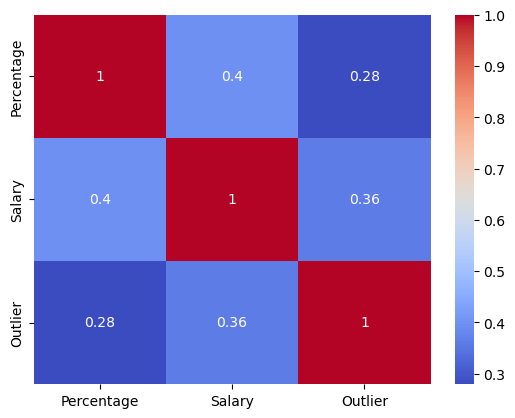

In [14]:
print("Summary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nCorrelation:")
print(df.corr())
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

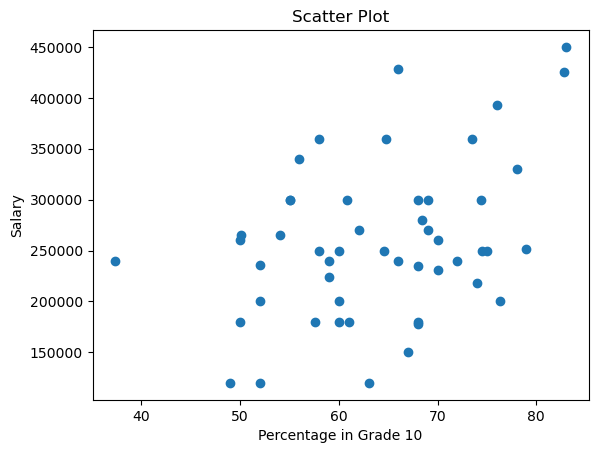

In [13]:
plt.scatter(df["Percentage"], df["Salary"])
plt.xlabel("Percentage in Grade 10")
plt.ylabel("Salary")
plt.title("Scatter Plot")
plt.show()


In [5]:
z_scores = np.abs((df["Salary"] - df["Salary"].mean()) / df["Salary"].std())
df["Outlier"] = z_scores > 2.5
df[df["Outlier"] == True]


,Percentage,Salary,Outlier
13,83.0,450000,True


In [20]:
X = df[["Percentage"]]   # feature
y = df["Salary"]         # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((40, 1), (10, 1))

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)


Slope (Coefficient): 2374.2293017448333
Intercept: 106610.49393003903


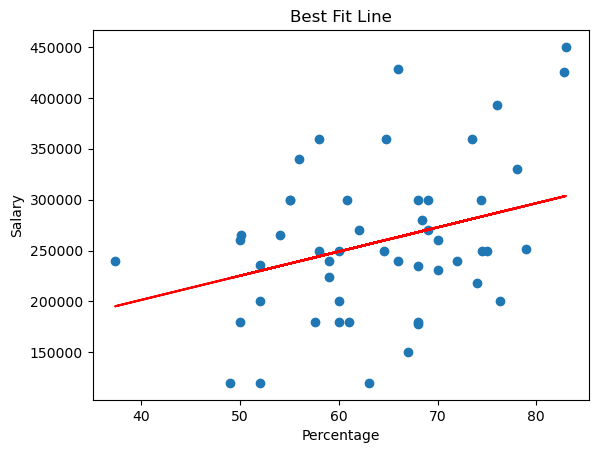

In [8]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.xlabel("Percentage")
plt.ylabel("Salary")
plt.title("Best Fit Line")
plt.show()


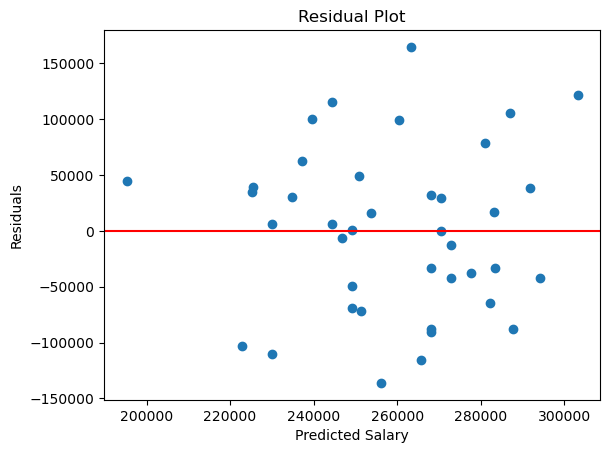

In [9]:
y_pred_train = model.predict(X_train)
residuals = y_train - y_pred_train

plt.scatter(y_pred_train, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [10]:
stat, p = shapiro(residuals)
print("Shapiro-Wilk p-value:", p)


Shapiro-Wilk p-value: 0.7452920505327034


In [11]:
cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
cv_rmse = np.sqrt(-cv_scores)
print("Cross-validation RMSE:", cv_rmse)
print("Avg CV RMSE:", cv_rmse.mean())


Cross-validation RMSE: [58922.63768587 78882.4955397  91485.45657018 63010.86305009
 65810.88210489]
Avg CV RMSE: 71622.46699014578


In [12]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test MAE:", mae)
print("Test R2 Score:", r2)


Test MSE: 3480554701.902649
Test RMSE: 58996.226166617205
Test MAE: 44950.163305414586
Test R2 Score: 0.3805122592921436
